In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from math import sqrt

In [8]:
df = pd.read_csv(r'C:\Users\ihsan\Downloads\data_fix_prec.txt')

In [4]:
df

,Date,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,...,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp,prec_obs.group,prec_nwp.group
1,2021-02-27 15:00:00,96001,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,...,57.5841,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
2,2021-02-27 18:00:00,96001,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,...,59.9813,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
3,2021-02-27 21:00:00,96001,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,...,67.3222,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
4,2021-02-28 00:00:00,96001,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,...,65.4942,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
5,2021-02-28 03:00:00,96001,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,...,73.4932,0,12,5.87655,95.33785,126,0.0,0.000000,no rain,no rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,2023-04-12 03:00:00,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,...,231.9670,0,12,-6.30253,106.75640,41,0.0,0.003601,no rain,no rain
543969,2023-04-12 06:00:00,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,...,268.5790,0,12,-6.30253,106.75640,41,0.0,3.669660,no rain,light rain
543970,2023-04-12 09:00:00,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,...,272.9220,0,12,-6.30253,106.75640,41,0.0,4.045040,no rain,light rain
543971,2023-04-12 12:00:00,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,...,259.2500,1,12,-6.30253,106.75640,41,0.0,0.000000,no rain,no rain


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543972 entries, 1 to 543972
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            543972 non-null  object 
 1   lokasi          543972 non-null  int64  
 2   suhu2m.degC.    543972 non-null  float64
 3   dew2m.degC.     543972 non-null  float64
 4   rh2m...         543972 non-null  float64
 5   wspeed.m.s.     543972 non-null  float64
 6   wdir.deg.       543972 non-null  float64
 7   lcloud...       543972 non-null  float64
 8   mcloud...       543972 non-null  float64
 9   hcloud...       543972 non-null  float64
 10  surpre.Pa.      543972 non-null  float64
 11  clmix.kg.kg.    543972 non-null  float64
 12  wamix.kg.kg.    543972 non-null  float64
 13  outlr.W.m2.     543972 non-null  float64
 14  pblh.m.         543972 non-null  float64
 15  lifcl.m.        543972 non-null  float64
 16  cape.j.kg.      543972 non-null  float64
 17  mdbz      

In [56]:
n = df.describe()

In [135]:
correlation_matrix = df_reg.corr()
correlation_matrix

C:\Users\ihsan\AppData\Local\Temp\ipykernel_14500\1850402623.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_reg.corr()


,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp
lokasi,1.000000,0.011234,0.002893,-0.017875,0.120233,-0.005473,0.015532,-0.048634,-0.078426,-0.086790,...,-0.115185,0.032068,-0.033738,-0.000510,NaN,-0.497541,0.849973,0.043582,-0.003232,0.001573
suhu2m.degC.,0.011234,1.000000,0.521950,-0.704093,0.303578,-0.024169,-0.095770,-0.240461,-0.190232,0.511580,...,-0.154752,-0.007477,-0.002326,-0.023269,NaN,-0.040206,-0.038942,-0.485698,-0.058584,-0.081135
dew2m.degC.,0.002893,0.521950,1.000000,0.231458,0.122349,0.032171,0.392454,0.003153,0.069596,0.703832,...,0.125487,-0.021972,0.024271,0.077295,NaN,0.091383,0.023938,-0.687138,0.045774,0.087634
rh2m...,-0.017875,-0.704093,0.231458,1.000000,-0.254005,0.053996,0.439449,0.280137,0.279066,0.013301,...,0.282358,-0.009319,0.021981,0.093180,NaN,0.125907,0.058864,-0.028837,0.108386,0.173599
wspeed.m.s.,0.120233,0.303578,0.122349,-0.254005,1.000000,0.014361,-0.086504,-0.160322,-0.119533,0.065374,...,-0.172941,0.059256,0.076043,-0.036501,NaN,-0.152728,0.058403,-0.050040,-0.016495,-0.014624
wdir.deg.,-0.005473,-0.024169,0.032171,0.053996,0.014361,1.000000,0.057652,0.116447,0.116471,-0.037513,...,0.141106,0.000234,0.150867,0.028626,NaN,0.013017,-0.004433,0.025529,0.023676,0.054063
lcloud...,0.015532,-0.095770,0.392454,0.439449,-0.086504,0.057652,1.000000,0.288155,0.096225,0.099208,...,0.151471,-0.007132,-0.013965,0.065086,NaN,0.080004,0.063050,-0.123885,0.131943,0.239585
mcloud...,-0.048634,-0.240461,0.003153,0.280137,-0.160322,0.116447,0.288155,1.000000,0.537287,-0.130905,...,0.588351,-0.012842,0.014798,-0.085029,NaN,0.155401,0.007248,0.116638,0.117085,0.199281
hcloud...,-0.078426,-0.190232,0.069596,0.279066,-0.119533,0.116471,0.096225,0.537287,1.000000,0.012846,...,0.827517,-0.028169,0.153012,-0.040420,NaN,0.204940,-0.019263,-0.015727,0.098309,0.166603
surpre.Pa.,-0.086790,0.511580,0.703832,0.013301,0.065374,-0.037513,0.099208,-0.130905,0.012846,1.000000,...,-0.035622,0.012033,0.004753,-0.004655,NaN,0.025117,-0.119773,-0.938753,-0.013626,-0.082145


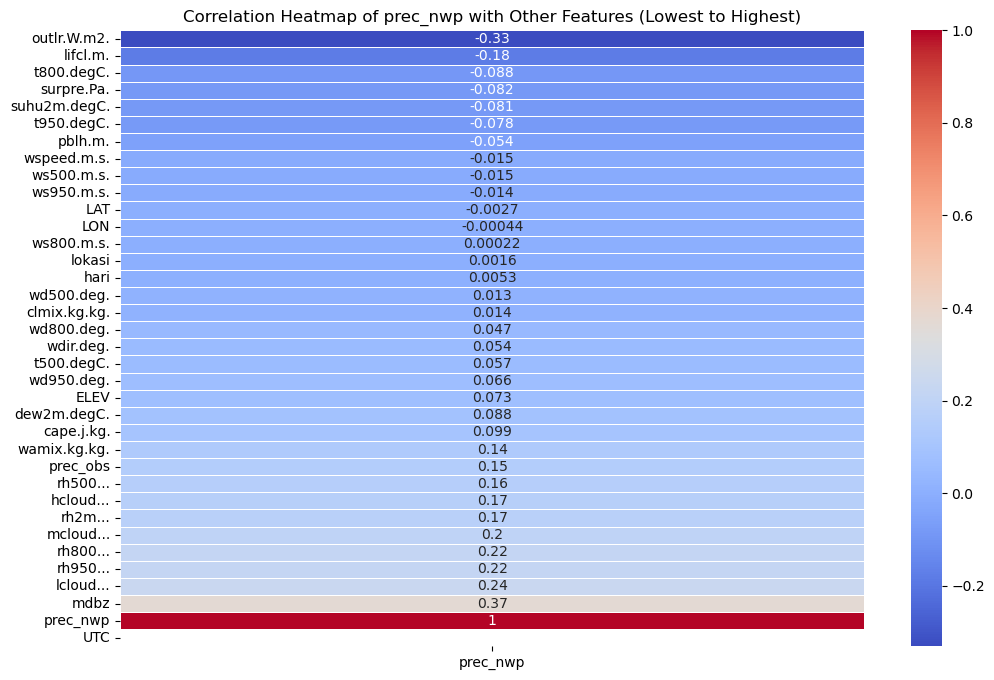

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
column_to_compare = "prec_nwp"

# Filter the correlation matrix to include only the correlations of the selected column
correlation_with_prec_nwp = correlation_matrix[[column_to_compare]]

# Sort the correlations in ascending order
correlation_with_prec_nwp_sorted = correlation_with_prec_nwp.sort_values(by=column_to_compare, ascending=True)

# Create a heatmap of the sorted correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_with_prec_nwp_sorted, annot=True, cmap="coolwarm", linewidths=.5)
plt.title(f"Correlation Heatmap of {column_to_compare} with Other Features (Lowest to Highest)")
plt.show()


In [57]:
df["prec_nwp"].value_counts()

0.000000e+00    149971
1.192090e-07        29
7.450580e-09        29
1.490120e-08        28
3.725290e-09        27
                 ...  
2.458890e-01         1
2.026400e-01         1
6.710410e-02         1
4.059030e-14         1
4.045040e+00         1
Name: prec_nwp, Length: 369673, dtype: int64

In [58]:
df["prec_obs.group"].value_counts()

no rain          465607
light rain        63609
moderate rain      8301
heavy rain         4779
violent rain       1676
Name: prec_obs.group, dtype: int64

In [59]:
df["prec_nwp.group"].value_counts()

no rain          383188
light rain       155514
moderate rain      3895
heavy rain         1016
violent rain        359
Name: prec_nwp.group, dtype: int64

In [10]:
X = df.drop(["prec_obs.group","prec_nwp.group", "Date", "prec_obs", "LAT", "LON"], axis=1) 
y = df["prec_obs"] 

In [11]:
X

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,ws800.m.s.,wd800.deg.,t500.degC.,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,ELEV,prec_nwp
1,96001,27.3973,21.6059,70.8014,3.433260,12.4580,0.553781,0.000000,0.000000,100564.0,...,0.767220,281.622,-5.20890,11.0889,6.22327,57.5841,0,12,126,0.000000
2,96001,27.0090,21.5161,72.0376,3.049010,27.2450,0.640686,0.000000,0.000000,100481.0,...,0.653591,250.969,-5.05963,12.7044,5.96761,59.9813,0,12,126,0.000000
3,96001,26.5672,21.4226,73.5149,2.045560,37.3569,0.717464,0.000000,0.000000,100265.0,...,0.823568,227.030,-4.89987,15.2381,7.04134,67.3222,0,12,126,0.000000
4,96001,26.4519,21.5400,74.5507,2.225080,20.1816,0.698006,0.000000,0.000000,100462.0,...,0.492229,120.120,-4.72228,16.3007,7.54606,65.4942,0,12,126,0.000000
5,96001,26.7230,21.3691,72.6038,2.342680,14.7934,0.626203,0.000000,0.000000,100667.0,...,1.688550,137.419,-4.64246,19.0442,8.93947,73.4932,0,12,126,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543968,99992,29.7642,23.4001,68.8035,3.721340,261.5040,0.390150,0.488739,0.327736,100401.0,...,6.484750,260.471,-4.69787,73.0758,2.29511,231.9670,0,12,41,0.003601
543969,99992,30.7901,24.1140,67.7143,5.811930,263.9440,0.536106,0.653845,0.377421,100234.0,...,7.014090,248.417,-4.63960,75.7922,2.05083,268.5790,0,12,41,3.669660
543970,99992,28.8450,24.1964,76.1178,5.839920,268.8950,0.229447,0.570225,0.455976,100067.0,...,8.068280,248.233,-4.40575,77.1489,2.52709,272.9220,0,12,41,4.045040
543971,99992,25.8334,23.9709,89.6050,0.500122,210.7490,0.087511,0.292942,0.447494,100218.0,...,7.675180,256.296,-4.33471,76.3170,3.07955,259.2500,1,12,41,0.000000


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [123]:
model = keras.Sequential([
    layers.Input(shape=(x_train.shape[1],)),  # Input layer with the number of features
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)  # Output layer with 1 neuron (for regression)
])

In [124]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [125]:
model.fit(x_train_scaled, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = model.predict(x_test_scaled)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Epoch 1/5
10880/10880 [==============================] - 70s 6ms/step - loss: 4.8141 - val_loss: 4.7300
Epoch 2/5
10880/10880 [==============================] - 71s 7ms/step - loss: 4.4277 - val_loss: 4.4900
Epoch 3/5
10880/10880 [==============================] - 84s 8ms/step - loss: 4.3281 - val_loss: 4.3055
Epoch 4/5
10880/10880 [==============================] - 57s 5ms/step - loss: 4.2419 - val_loss: 4.2126
Epoch 5/5
3400/3400 [==============================] - 13s 4ms/step
Root Mean Squared Error (RMSE): 1.94


In [137]:
evaluation = model.evaluate(x_test_scaled, y_test)
accuracy = evaluation[1]

3400/3400 [==============================] - 12s 3ms/step - loss: 3.7696


TypeError: 'float' object is not subscriptable

In [141]:
model.metrics_names

['loss']

In [140]:
if len(model.metrics_names) > 1:
    loss = evaluation[0]  # First element is the loss
    accuracy = evaluation[1]  # Second element is the accuracy (or other metrics)
    print(f"Loss: {loss:.4f}")
    print(f"Accuracy: {accuracy:.4f}")
else:
    # If no additional metrics were specified, the evaluation is just the loss
    loss = evaluation
    print(f"Loss: {loss:.4f}")

Loss: 3.7696


In [126]:
mae = mean_absolute_error(y_test, y_pred)

In [128]:
mae

0.6225901176225622

In [14]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Create and train the XGBoost regressor
modelxgb = XGBRegressor()
modelxgb.fit(x_train_scaled, y_train)

# Make predictions on the test set
y_pred_xgb = modelxgb.predict(x_test_scaled)

# Calculate root mean squared error (RMSE)
mae = mean_absolute_error(y_test, y_pred_xgb)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Train score:")
print(modelxgb.score(x_train_scaled, y_train))

print("Test score:")
print(modelxgb.score(x_test_scaled, y_test))

Mean Absolute Error (MAE): 1.68
Root Mean Squared Error (RMSE): 5.22
Train score:
0.23422906381637698
Test score:
0.05034696301835406


In [18]:
df.describe()

,lokasi,suhu2m.degC.,dew2m.degC.,rh2m...,wspeed.m.s.,wdir.deg.,lcloud...,mcloud...,hcloud...,surpre.Pa.,...,rh500...,ws500.m.s.,wd500.deg.,hari,UTC,LAT,LON,ELEV,prec_obs,prec_nwp
count,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000,...,543972.000000,543972.000000,543972.000000,543972.000000,543972.0,543972.000000,543972.000000,543972.000000,543972.000000,543972.000000
mean,96884.253246,26.239687,22.721024,82.062679,2.591377,181.622294,0.607284,0.534008,0.362315,99343.804977,...,67.603203,5.349709,144.649245,0.160951,12.0,-3.042335,115.317454,102.614399,1.068154,0.788024
std,588.246706,2.880382,2.107317,11.519270,1.716483,98.588749,0.273118,0.325368,0.296902,3088.938749,...,22.169735,2.749671,87.579204,0.367486,0.0,4.024567,11.471885,269.048819,5.277032,2.818574
min,96001.000000,11.394600,3.866710,23.164500,0.003070,0.000916,0.000000,0.000000,0.000000,81048.100000,...,0.000015,0.089455,0.145816,0.000000,12.0,-10.766620,95.337850,0.000000,0.000000,0.000000
25%,96297.000000,24.273400,21.947500,74.605575,1.293957,103.640000,0.433855,0.282186,0.030081,99399.300000,...,56.061275,3.244380,81.347750,0.000000,12.0,-6.700000,106.563900,5.000000,0.000000,0.000000
50%,96855.000000,26.547100,23.211000,83.398500,2.236045,176.649000,0.645360,0.564213,0.352235,100411.000000,...,72.616900,5.000060,107.554000,0.000000,12.0,-3.045240,114.355300,15.000000,0.000000,0.017781
75%,97282.000000,28.279400,24.120200,90.934000,3.530800,266.114250,0.818189,0.808784,0.616878,100744.000000,...,84.475725,7.078777,216.549000,0.000000,12.0,-0.142060,122.852500,50.000000,0.000000,0.360122
max,99992.000000,36.192300,27.283400,100.000000,22.739000,359.998000,1.000000,1.000000,1.000000,101575.000000,...,100.000000,25.247400,359.682000,1.000000,12.0,5.876550,140.720000,1653.000000,450.000000,123.021400


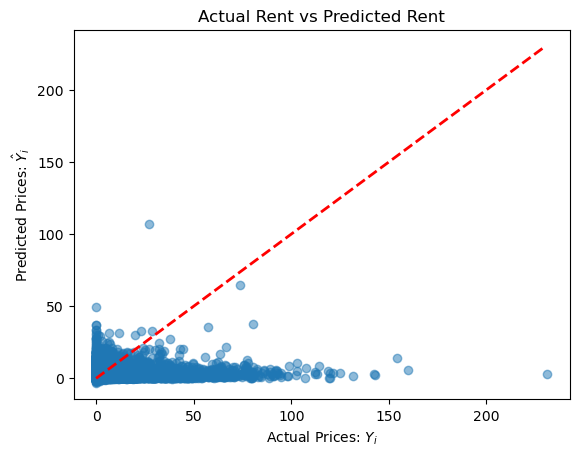

In [15]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_xgb are your actual and predicted values
plt.scatter(y_test, y_pred_xgb, alpha=0.5)  # Scatter plot of actual vs. predicted

# Plot the line representing the ideal case (perfect prediction)
plt.plot(range(int(max(y_test))), range(int(max(y_test))), color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()


In [ ]:
import xgboost as xgb

# Assuming you have already defined and trained your XGBoost regression model (modelxgb)
# You can access feature importances using the following code:

feature_importance = modelxgb.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")


In [146]:
import numpy as np
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'n_estimators': [100, 200, 300],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
}
modelxgb = XGBRegressor()

# Create a randomized search object
random_search = RandomizedSearchCV(
    estimator=modelxgb,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Use RMSE as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
)

# Fit the randomized search to your data
random_search.fit(x_train_scaled, y_train)

best_params = grid_search.best_params_  # Or random_search.best_params_ for RandomizedSearchCV
best_model = grid_search.best_estimator_  # Or random_search.best_estimator_ for RandomizedSearchCV

print("Train score:")
print(best_model.score(x_train_scaled, y_train))

print("Test score:")
print(best_model.score(x_test_scaled, y_test))